# Quiz 3

BEFORE YOU START THIS QUIZ:

1. Click on "Copy to Drive" to make a copy of the quiz

2. Click on "Share",
    
3. Click on "Change" and select "Anyone with this link can edit"
    
4. Click "Copy link" and

5. Paste the link into [this Canvas assignment](https://canvas.olin.edu/courses/315/assignments/4975).

This quiz is based on Chapters 6 and 7 of [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2021 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/Cell2D.py')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from utils import decorate

## Question 1

In the Game of Life, the next state of each cell depends on its current state and the number of neighboring live cells.

Let's generalize that: suppose the next state of each cell depends on its own state and the states of its eight neighbors (not just the total).  How many different rule tables are there for this kind of cellular automaton?

Please state you answer as a mathematical expression, but also feel free to compute it.

In [3]:
# Solution

# There are $2^9$ different neighborhood states, 
# so each table contains $2^9$ bits, 
# which means there are 2^(2^9) possible tables.

In [4]:
# Solution

2**2**9

13407807929942597099574024998205846127479365820592393377723561443721764030073546976801874298166903427690031858186486050853753882811946569946433649006084096

## Question 2

The following cell contains the Game of Life code from Chapter 6.

In [5]:
from scipy.signal import correlate2d
from Cell2D import Cell2D

class Life(Cell2D):
    """Implementation of Conway's Game of Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]

Make a modified version of this class that implements a variation of Game of Life with the following rules.

* The future state of a cell depends on its current state and the state of its eight neighbors, as in Game of Life.

* However, unlike in Game of Life, this variation distinguishes between the four adjacent neighbors (north, south, east, and west) and the four diagonal neighbors (northeast, southeast, etc.)

* If a cell is alive, it stays alive only if the number of live adjacent neighbors is even.

* If a cell is dead, it comes to life only if the number of live diagonal neighbors is odd.

Hint: One way to implement these rules is to call `correlate2d` twice and use array logic operations. Another option is to call `correlate2d` once and use a table.

In [6]:
# Solution

from scipy.signal import correlate2d
from Cell2D import Cell2D

class Life(Cell2D):
    """Implementation of Conway's Game of Life."""
    kernel = np.array([[1,  10, 1],
                       [10, 100, 10],
                       [1,  10, 1]])

    table = np.zeros(200, dtype=np.uint8)
    table[[i for i in range(100) if i%2==1]] = 1
    table[[i+100 for i in range(100) if i//10%2==0]] = 1

    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]

In [7]:
# Solution

from scipy.signal import correlate2d
from Cell2D import Cell2D

class Life(Cell2D):
    """Implementation of Conway's Game of Life."""
    kernel1 = np.array([[1, 0, 1],
                        [0, 0, 0],
                        [1, 0, 1]])

    kernel2 = np.array([[0, 1, 0],
                        [1, 0, 1],
                        [0, 1, 0]])


    def step(self):
        """Executes one time step."""
        a = self.array
        c1 = correlate2d(a, self.kernel1, mode='same')
        c2 = correlate2d(a, self.kernel2, mode='same')
        self.array = (~a & (c1%2==1)) | (a & (c2%2==0))

You can use the code below to test your implementation of these rules.

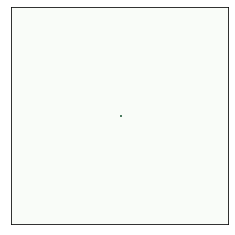

In [8]:
n = 100
life = Life(n, n)
life.add_cells(n//2, n//2, '1')
life.draw()

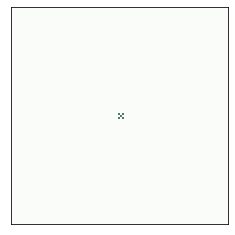

In [9]:
life.step()
life.draw()

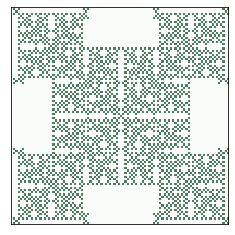

In [10]:
life.animate(49, 0.01)

If things have gone according to plan, the result should look like this.

In [11]:
bits = np.array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         0,   0,   0,   5,   0,   0,   0,   5,   0,   0,   0,   5,  32,
         0,   0,   0,  32,   0,   0,   0,  32,   0,   0,   0,  37,  85,
        85,  85,  84,   0,   0,   0,   1,  85,  85,  85,  85,   8, 136,
       136, 136, 160,   0,   0,   0,  40, 136, 136, 136, 129,  80,  80,
        80,  85,   0,   0,   0,   5,  80,  80,  80,  84,   2, 138, 138,
       138, 128,   0,   0,   0,  10, 138, 138, 138,   1,  85,  64,  21,
        64,   0,   0,   0,   0,  21,  64,  21,  84,  10, 138, 138, 138,
       128,   0,   0,   0,  10, 138, 138, 138, 129,  21,  80,  85,  80,
         0,   0,   0,   0,  85,  80,  85,  68,   0,  40, 136, 168, 128,
         0,   0,   0,   8, 168, 136, 160,   1,  21,  85,  84,   0,   0,
         0,   0,   0,   1,  85,  85,  68,  10, 168, 136, 168, 128,   0,
         0,   0,   8, 168, 136, 170, 129,  85,  80,  85,  80,   0,   0,
         0,   0,  85,  80,  85,  84,   2, 130, 138, 170, 128,   0,   0,
         0,  10, 170, 138,  10,   1,  69,  85,  65,  64,   0,   0,   0,
         0,  20,  21,  85,  20,  10, 170, 138, 162, 128,   0,   0,   0,
        10,  42, 138, 170, 129,   1,  21,  85,  80,   0,   0,   0,   0,
        85,  85,  68,   4,   0,   0,  40, 128, 128,   0,   0,   0,   8,
         8, 160,   0,   1,   1,  21,  85,  85,  85,  85,  85,  85,  85,
        85,  68,   4,  10, 170, 168, 136, 136, 136, 136, 136, 136, 136,
       170, 170, 129,  69,  85,  80,  80,  80,  80,  80,  80,  80,  85,
        85,  20,   2, 130, 130, 138, 138, 138, 138, 138, 138, 138,  10,
        10,   1,  85,  69,  85,  64,  21,  64,  21,  64,  21,  85,  21,
        84,  10, 170, 170, 138, 138, 138, 138, 138, 138, 138, 170, 170,
       129,  21,  69,  21,  80,  85,  80,  85,  80,  85,  69,  21,  68,
         0,  42, 128,  40, 136, 168, 136, 168, 136, 160,  10, 160,   1,
        20,  85,  21,  85,  84,   0,   1,  85,  85,  69,  81,  68,  10,
       170,  10, 168, 136, 168, 136, 168, 136, 170, 130, 170, 129,  84,
        85,  85,  80,  85,  80,  85,  80,  85,  85,  81,  84,   2, 130,
       130, 130, 138, 170, 138, 170, 138,  10,  10,  10,   1,  68,  69,
        69,  85,  65,  64,  20,  21,  85,  21,  17,  20,  10, 170, 170,
       170, 138, 162, 138,  42, 138, 170, 170, 170, 133,  64,   1,   1,
        21,  85,  80,  85,  85,  68,   4,   0,  21,  40,   0,   0,   0,
        40, 128, 136,   8, 160,   0,   0,   0, 164,  64,   1,   1,  21,
        85,  85,  85,  85,  68,   4,   0,  17,   0,   0,  10, 170, 168,
       136, 136, 136, 170, 170, 128,   0,   0,   0,   1,  69,  85,  80,
        80,  80,  85,  85,  20,   0,   0,   0,   0,   2, 130, 130, 138,
       138, 138,  10,  10,   0,   0,   0,   0,   1,  85,  69,  85,  64,
        21,  85,  21,  84,   0,   0,   0,   0,  10, 170, 170, 138, 138,
       138, 170, 170, 128,   0,   0,   0,   1,  21,  69,  21,  80,  85,
        69,  21,  68,   0,   0,   0,   0,   0,  42, 128,  40, 136, 160,
        10, 160,   0,   0,   0,   0,   1,  20,  85,  21,  85,  85,  69,
        81,  68,   0,   0,   0,   0,  10, 170,  10, 168, 136, 170, 130,
       170, 128,   0,   0,   0,   1,  84,  85,  85,  80,  85,  85,  81,
        84,   0,   0,   0,   0,   2, 130, 130, 130, 138,  10,  10,  10,
         0,   0,   0,   0,   1,  68,  69,  69,  85,  85,  21,  17,  20,
         0,   0,   0,   0,  10, 170, 170, 170, 138, 170, 170, 170, 128,
         0,   0,   0,   1,   0,   1,   1,  21,  68,   4,   0,   4,   0,
         0,   0,   0,   0,   0,   0,   0,  32,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   1,   1,  21,  68,   4,   0,   4,   0,   0,
         0,   0,  10, 170, 170, 170, 138, 170, 170, 170, 128,   0,   0,
         0,   1,  68,  69,  69,  85,  85,  21,  17,  20,   0,   0,   0,
         0,   2, 130, 130, 130, 138,  10,  10,  10,   0,   0,   0,   0,
         1,  84,  85,  85,  80,  85,  85,  81,  84,   0,   0,   0,   0,
        10, 170,  10, 168, 136, 170, 130, 170, 128,   0,   0,   0,   1,
        20,  85,  21,  85,  85,  69,  81,  68,   0,   0,   0,   0,   0,
        42, 128,  40, 136, 160,  10, 160,   0,   0,   0,   0,   1,  21,
        69,  21,  80,  85,  69,  21,  68,   0,   0,   0,   0,  10, 170,
       170, 138, 138, 138, 170, 170, 128,   0,   0,   0,   1,  85,  69,
        85,  64,  21,  85,  21,  84,   0,   0,   0,   0,   2, 130, 130,
       138, 138, 138,  10,  10,   0,   0,   0,   0,   1,  69,  85,  80,
        80,  80,  85,  85,  20,   0,   0,   0,   0,  10, 170, 168, 136,
       136, 136, 170, 170, 128,   0,   4,  64,   1,   1,  21,  85,  85,
        85,  85,  68,   4,   0,  17,  40,   0,   0,   0,  40, 128, 136,
         8, 160,   0,   0,   0, 165,  64,   1,   1,  21,  85,  80,  85,
        85,  68,   4,   0,  21,  10, 170, 170, 170, 138, 162, 138,  42,
       138, 170, 170, 170, 129,  68,  69,  69,  85,  65,  64,  20,  21,
        85,  21,  17,  20,   2, 130, 130, 130, 138, 170, 138, 170, 138,
        10,  10,  10,   1,  84,  85,  85,  80,  85,  80,  85,  80,  85,
        85,  81,  84,  10, 170,  10, 168, 136, 168, 136, 168, 136, 170,
       130, 170, 129,  20,  85,  21,  85,  84,   0,   1,  85,  85,  69,
        81,  68,   0,  42, 128,  40, 136, 168, 136, 168, 136, 160,  10,
       160,   1,  21,  69,  21,  80,  85,  80,  85,  80,  85,  69,  21,
        68,  10, 170, 170, 138, 138, 138, 138, 138, 138, 138, 170, 170,
       129,  85,  69,  85,  64,  21,  64,  21,  64,  21,  85,  21,  84,
         2, 130, 130, 138, 138, 138, 138, 138, 138, 138,  10,  10,   1,
        69,  85,  80,  80,  80,  80,  80,  80,  80,  85,  85,  20,  10,
       170, 168, 136, 136, 136, 136, 136, 136, 136, 170, 170, 129,   1,
        21,  85,  85,  85,  85,  85,  85,  85,  85,  68,   4,   0,   0,
        40, 128, 128,   0,   0,   0,   8,   8, 160,   0,   1,   1,  21,
        85,  80,   0,   0,   0,   0,  85,  85,  68,   4,  10, 170, 138,
       162, 128,   0,   0,   0,  10,  42, 138, 170, 129,  69,  85,  65,
        64,   0,   0,   0,   0,  20,  21,  85,  20,   2, 130, 138, 170,
       128,   0,   0,   0,  10, 170, 138,  10,   1,  85,  80,  85,  80,
         0,   0,   0,   0,  85,  80,  85,  84,  10, 168, 136, 168, 128,
         0,   0,   0,   8, 168, 136, 170, 129,  21,  85,  84,   0,   0,
         0,   0,   0,   1,  85,  85,  68,   0,  40, 136, 168, 128,   0,
         0,   0,   8, 168, 136, 160,   1,  21,  80,  85,  80,   0,   0,
         0,   0,  85,  80,  85,  68,  10, 138, 138, 138, 128,   0,   0,
         0,  10, 138, 138, 138, 129,  85,  64,  21,  64,   0,   0,   0,
         0,  21,  64,  21,  84,   2, 138, 138, 138, 128,   0,   0,   0,
        10, 138, 138, 138,   1,  80,  80,  80,  85,   0,   0,   0,   5,
        80,  80,  80,  84,   8, 136, 136, 136, 160,   0,   0,   0,  40,
       136, 136, 136, 133,  85,  85,  85,  84,   0,   0,   0,   1,  85,
        85,  85,  85,  32,   0,   0,   0,  32,   0,   0,   0,  32,   0,
         0,   0,  37,   0,   0,   0,   5,   0,   0,   0,   5,   0,   0,
         0,   5], dtype=np.uint8)

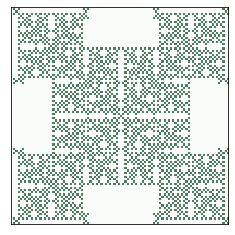

In [12]:
life2 = Life(100)
life2.array = np.unpackbits(bits).reshape(n, n)
life2.draw()

## Question 3

The result from the previous question appears to be fractal. But some things that appear fractal are actually not, so let's check.

The following loop implements something like a box-counting algorithm:

* Starting in the middle of the array, it counts the number of live cells in a small box.

* Then it increases the size of the box, growing toward the boundaries.

* For each box size, it counts the number of live cells.

The result is a list of `(x, y)` pairs, where `x` is half the width (and height) of the box, and `y` is the number of live cells.

In [17]:
n, m = life2.array.shape

half = n//2

res = []
xs = range(1, half)
for x in xs:
    low, high = half-x, half+x
    y = life2.array[low:high, low:high].sum()
    res.append((x, y))

xs, ys = np.transpose(res)

To interpret these results:

* Make an appropriate plot and write a sentence or two to interpret it.

* Estimate the fractal dimension and write a sentence or two to interpret the result.


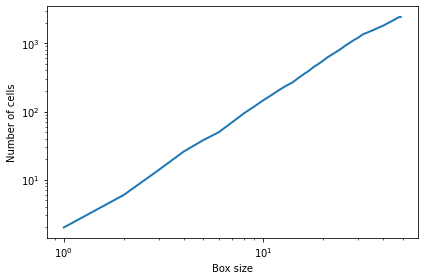

In [14]:
# Solution

import matplotlib.pyplot as plt

plt.plot(xs, ys)
decorate(xlabel='Box size',
         ylabel='Number of cells',
         xscale='log',
         yscale='log')

In [15]:
# Solution

from scipy.stats import linregress

linregress(np.log(xs), np.log(ys))

LinregressResult(slope=1.874470921165799, intercept=0.648808094971062, rvalue=0.9991166857231017, pvalue=2.3299902241517566e-66, stderr=0.011499799372051638, intercept_stderr=0.03540090002291299)

In [16]:
# Solution

np.log(8) / np.log(3)

1.892789260714372